In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Probability mass functions

<p style="font-size:20px">which maps from each value to its probability. A probability is a
frequency expressed as a fraction of the sample size, n . To get from frequencies to probabilities, we divide through by n , which is called normalization.</p>

Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
t = [1, 2, 2, 3, 5,3,2,5,2,4,1,2,3,2,5,1,2,2,2,2]

In [3]:
t

[1, 2, 2, 3, 5, 3, 2, 5, 2, 4, 1, 2, 3, 2, 5, 1, 2, 2, 2, 2]

In [4]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [5]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Here's the histogram of birth weights:

In [6]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
hist

Hist({0.0: 8, 1.0: 40, 2.0: 53, 3.0: 98, 4.0: 229, 5.0: 697, 6.0: 2223, 7.0: 3049, 8.0: 1889, 9.0: 623, 10.0: 132, 11.0: 26, 12.0: 10, 13.0: 3, 14.0: 3, 15.0: 1})

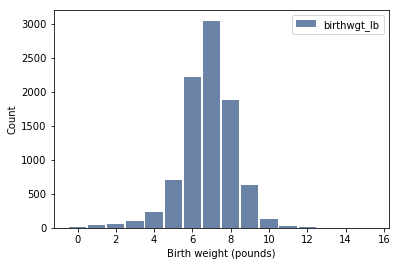

In [7]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To normalize the disrtibution, we could divide through by the total count:

In [8]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    hist[x] = freq / n

hist

Hist({0.0: 0.00088066930867459266, 1.0: 0.0044033465433729636, 2.0: 0.0058344341699691762, 3.0: 0.010788199031263761, 4.0: 0.025209158960810215, 5.0: 0.076728313518273888, 6.0: 0.24471598414795245, 7.0: 0.33564509026860412, 8.0: 0.20794804051078819, 9.0: 0.068582122413033908, 10.0: 0.014531043593130779, 11.0: 0.0028621752531924264, 12.0: 0.0011008366358432409, 13.0: 0.00033025099075297226, 14.0: 0.00033025099075297226, 15.0: 0.00011008366358432408})

The result is a Probability Mass Function (PMF).

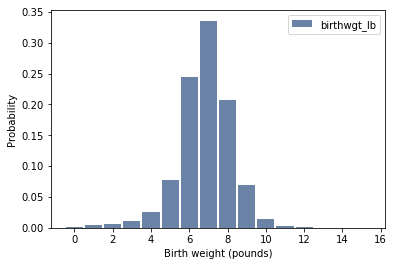

In [9]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Probability')

More directly, we can create a Pmf object.

In [10]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5,3,2,5,2,4,1,2,3,2,5,1,2,2,2,2])
pmf

Pmf({1: 0.15000000000000002, 2: 0.5, 3: 0.15000000000000002, 4: 0.05, 5: 0.15000000000000002})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [11]:
pmf.Prob(4)

0.05

The bracket operator does the same thing.

In [12]:
pmf[2]

0.5

The `Incr` method adds to the probability associated with a given values.

In [13]:
pmf.Incr(2, 0.2)
pmf[2]

0.7

In [14]:
pmf

Pmf({1: 0.15000000000000002, 2: 0.7, 3: 0.15000000000000002, 4: 0.05, 5: 0.15000000000000002})

The `Mult` method multiplies the probability associated with a value.

In [15]:
pmf.Mult(2, 0.5)
pmf[2]

0.35

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [16]:
pmf.Total()

0.8500000000000001

In [17]:
pmf

Pmf({1: 0.15000000000000002, 2: 0.35, 3: 0.15000000000000002, 4: 0.05, 5: 0.15000000000000002})

`Normalize` divides through by the total probability, making it 1 again.

In [18]:
pmf.Normalize()
pmf.Total()

1.0

In [19]:
pmf

Pmf({1: 0.17647058823529413, 2: 0.41176470588235287, 3: 0.17647058823529413, 4: 0.0588235294117647, 5: 0.17647058823529413})

<div style="font-size:20px">
<li><ul>
- To plot a Pmf as a bar graph, you can use thinkplot.Hist . Bar graphs are most useful if the number of values in the Pmf is small. </ul><ul>
- To plot a Pmf as a step function, you can use thinkplot.Pmf . This option is most useful if there are a large number of values and the Pmf is smooth. This function also works with Hist objects.</ul></li>
</div>

Here's the PMF of pregnancy length for live births.

In [20]:
pmf1 = thinkstats2.Pmf(live.prglngth, label='prglngth')
pmf1

Pmf({0: 0.00010931351114997814, 4: 0.00010931351114997814, 9: 0.00010931351114997814, 13: 0.00010931351114997814, 17: 0.00021862702229995628, 18: 0.00010931351114997814, 19: 0.00010931351114997814, 20: 0.00010931351114997814, 21: 0.00021862702229995628, 22: 0.00076519457804984699, 23: 0.00010931351114997814, 24: 0.0014210756449497158, 25: 0.00032794053344993443, 26: 0.003825972890249235, 27: 0.00032794053344993443, 28: 0.0034980323567993005, 29: 0.002295583734149541, 30: 0.015085264538696984, 31: 0.00295146480104941, 32: 0.012571053782247486, 33: 0.005356362046348929, 34: 0.006558810668998688, 35: 0.0339965019676432, 36: 0.035089637079142984, 37: 0.049737647573240056, 38: 0.066353301268036735, 39: 0.51300830782684737, 40: 0.1219938784433756, 41: 0.064167031045037168, 42: 0.035854831657192832, 43: 0.016178399650196764, 44: 0.005028421512898994, 45: 0.0010931351114997815, 46: 0.00010931351114997814, 47: 0.00010931351114997814, 48: 0.00076519457804984699, 50: 0.00021862702229995628})

Here's what it looks like plotted with `Hist`, which makes a bar graph.

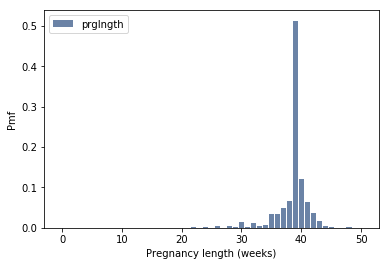

In [21]:
thinkplot.Hist(pmf1)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

Here's what it looks like plotted with `Pmf`, which makes a step function.

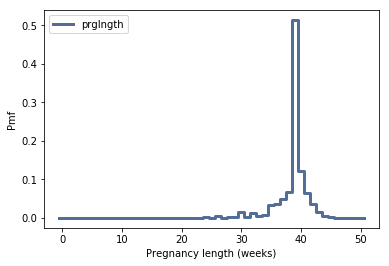

In [22]:
thinkplot.Pmf(pmf1)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [23]:
live, firsts, others = first.MakeFrames()
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Here are the distributions of pregnancy length.

In [24]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')
first_pmf 

Pmf({0: 0.00022660321776569228, 17: 0.00022660321776569228, 20: 0.00022660321776569228, 21: 0.00022660321776569228, 22: 0.00067980965329707678, 23: 0.00022660321776569228, 24: 0.0015862225243598459, 25: 0.00022660321776569228, 26: 0.0036256514842510764, 27: 0.00022660321776569228, 28: 0.0054384772263766142, 29: 0.0020394289598912306, 30: 0.016542034896895538, 31: 0.0033990482664853841, 32: 0.012463176977113076, 33: 0.0063448900974393836, 34: 0.0065714933152050759, 35: 0.036029911624745073, 36: 0.038975753455699071, 37: 0.047133469295263991, 38: 0.0616360752322683, 39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.081577158395649219, 42: 0.046453659641966918, 43: 0.019714479945615229, 44: 0.0052118740086109228, 45: 0.0013596193065941536, 46: 0.00022660321776569228, 47: 0.00022660321776569228, 48: 0.00067980965329707678})

And here's the code that replicates one of the figures in the chapter.

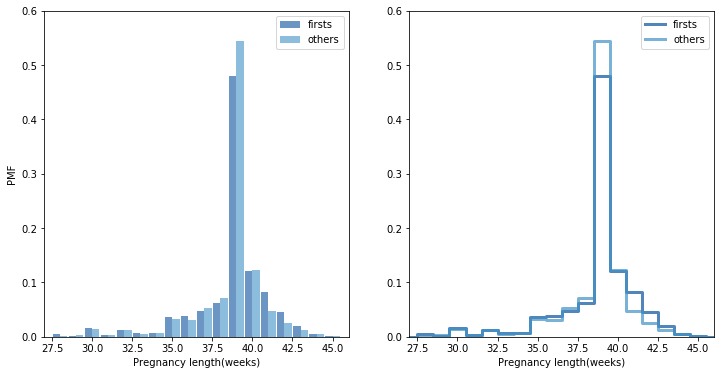

In [25]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

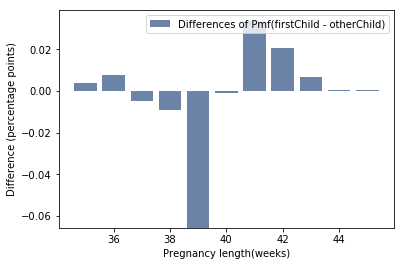

In [26]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs, label="Differences of Pmf(firstChild - otherChild)")
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [27]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
pmf

Pmf({32: 0.18461538461538463, 37: 0.12307692307692308, 7: 0.12307692307692308, 42: 0.046153846153846156, 12: 0.12307692307692308, 47: 0.03076923076923077, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231})

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [28]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

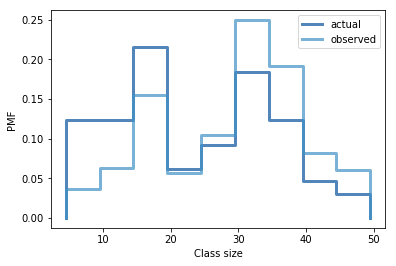

In [29]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [30]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.6923076923
Observed mean 29.1233766234


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [31]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [32]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.6923076923


And plot the two distributions to confirm they are the same.

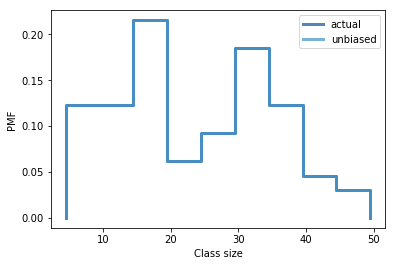

In [33]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [34]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
array
df = pandas.DataFrame(array)
df

,0,1
0,0.731530,0.626593
1,-0.482743,1.007143
2,0.623826,0.644574
3,-0.969852,-1.299469


We can specify column names when we create the DataFrame:

In [35]:
col = ['A', 'B']
df = pandas.DataFrame(array, columns=col)
df

,A,B
0,0.731530,0.626593
1,-0.482743,1.007143
2,0.623826,0.644574
3,-0.969852,-1.299469


We can also specify an index that contains labels for the rows.

In [36]:
inx = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=col, index=inx)
df

,A,B
a,0.731530,0.626593
b,-0.482743,1.007143
c,0.623826,0.644574
d,-0.969852,-1.299469


Normal indexing selects columns.

In [37]:
df['A']
df.A

a    0.731530
b   -0.482743
c    0.623826
d   -0.969852
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [38]:
df.loc['a']

A    0.731530
B    0.626593
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [39]:
df.iloc[0]

A    0.731530
B    0.626593
Name: a, dtype: float64

`loc` can also take a list of labels.

In [40]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.731530,0.626593
c,0.623826,0.644574


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [41]:
df['a':'c']

,A,B
a,0.731530,0.626593
b,-0.482743,1.007143
c,0.623826,0.644574


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [42]:
df[0:2]

,A,B
a,0.731530,0.626593
b,-0.482743,1.007143


In [43]:
t = [1,2,3,4,5,6,7,7,5,4,33]
t[3:4]

[4]

But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

# Lab Sessions

**Exercise 1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

- Use the NSFG respondent variable `numkdhh` that is the number of children under 18 in the respondents' households. Construct the actual distribution for `numkdhh` use nsfg.ReadFemResp() to call data from. Now compute the biased distribution
<br><br>
- Plot the actual and biased distributions, and compute their means.

In [44]:
resp = nsfg.ReadFemResp()

2.4036791006642821

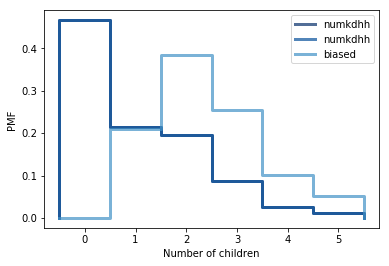

In [45]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')
pmf.Mean()
biased.Mean()

**Exercise 2:** 
- Create a panda dataframe with 50 rows and 10 column from a numpy array that built up by random numbers from 1 to 100 , columns name must be letters and row indexes must be even numbers. show the row of dataframe which is index's name called 10 and show the row that index's position is 10 in this dataframe. 
- Show the rows and columns which is between index's name called 20 and 40(both numbers include)
- Show the rows and all columns which is between first 5 and last 10 rows
- Show the rows and all columns which is between first 5 and last 10 rows with last 5 column

In [46]:
import numpy as np
import pandas
import pprint
columns = ['a', 'b','c','d','e','f','g','h','i','j']
indexes = []
count = 0
i = 0
while count < 50:
    if i%2 == 0:
        count += 1
        indexes.append(i)
    i += 1
array = np.random.randn(50, 10)
df = pandas.DataFrame(array, columns=columns, index=indexes)
#pprint.pprint(df)
df.loc[10]
df.iloc[10]

df.loc['20':'40']
indeces = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4]
df.iloc[indeces]
df.iloc[indeces, -5:]

,f,g,h,i,j
80,-0.997920,0.931125,-0.170391,1.975656,0.446459
82,1.624255,2.012936,-0.338427,-1.521499,-0.273098
84,-0.778754,0.479355,0.950843,-0.709327,1.266167
86,1.427195,-0.175817,-0.281123,1.846975,0.439202
88,0.662040,-0.290168,-1.026481,-0.403420,-0.803052
90,2.190290,-0.428434,-1.411988,-0.719326,-0.756392
92,-0.081065,-0.873501,1.800906,0.252403,1.099522
94,-0.680640,0.739597,0.239751,-0.611041,-2.043915
96,-0.229341,0.531812,-1.512985,0.906828,0.621043
98,1.063189,-0.360732,-0.919929,0.772371,-1.267104
